In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## Se carga el archivo Train

In [4]:
titanic_df = pd.read_csv('data/train.csv')

In [5]:
titanic_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


#### Detalles de las variables

##### train.csv: Registros personales de aproximadamente dos tercios (~8700) de los pasajeros, que se utilizarán como datos de entrenamiento

PassengerId: Una identificación única para cada pasajero. Cada ID toma el formato gggg_pp donde gggg indica un grupo con el que viaja el pasajero y pp es su número dentro del grupo. Las personas de un grupo suelen ser miembros de la familia, pero no siempre.

HomePlanet: El planeta del que partió el pasajero, normalmente su planeta de residencia permanente.

CryoSleep: Indica si el pasajero optó por ser puesto en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.

s.
C:iEl número de cabina donde se aloja el pasajero. Toma el formato cubierta/número/lado, donde el lado puede ser P para Babor o S para Estribor.

Destino: el planeta hacia el que desembarcara el pasajero.

 to:
La edad de los pasajeros.

nge:
Si el pasajero ha pagado por un servicio VIP especial durante el viaje.

oyage.
RoomService, FoodCourt, ShoppingMall, Spa:VMonto que el pasajero ha facturado en cada una de las muchas comodidades de lujo del Spaceship Titanic.

Nombre: el nombre y apellido del pasajero.

ssenger.
T:nSi el pasajero fue transportado a otra dimensión. Este es el objetivo, la columna que intentas predecir.True or False.

## Se comienza hacer el proceso EDA

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
titanic_df.shape

(8693, 14)

In [7]:
titanic_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
len(titanic_df['PassengerId'].unique())

8693

In [9]:
titanic_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Visualización de datos

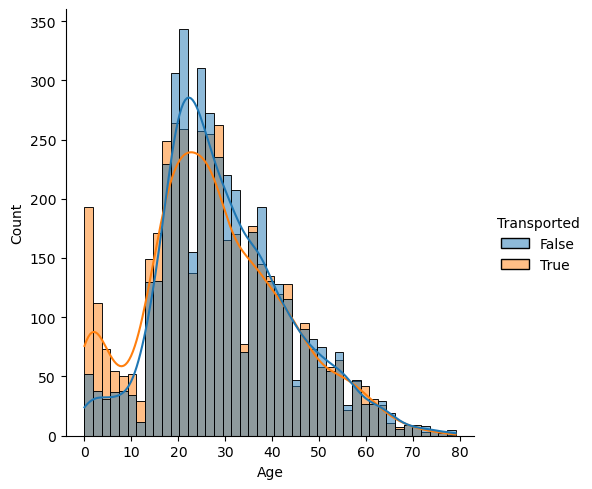

In [8]:
# Relación entre la edad de los pasajeron y la probabilidad de ser transportados a otra dimensión
sns.displot(titanic_df, x='Age', hue='Transported', kde=True, common_norm=False)

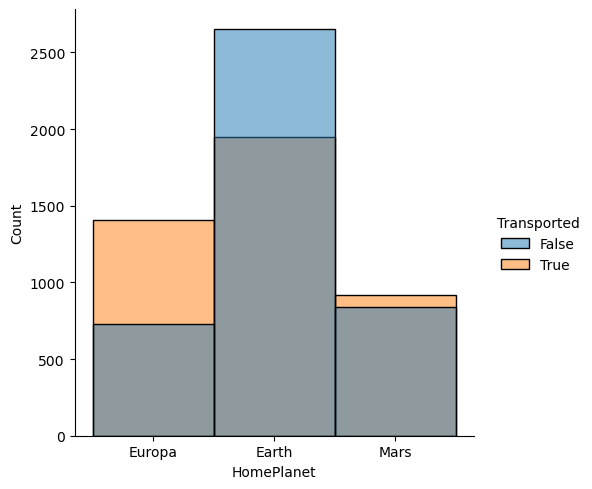

In [10]:
# Relación entre el pais de origen de los pasajeron y la probabilidad de ser transportados a otra dimensión
sns.displot(titanic_df, x='HomePlanet', hue='Transported', common_norm=False)

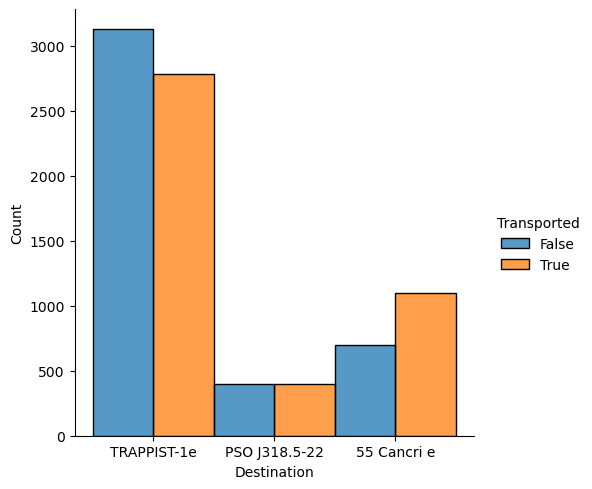

In [4]:
# Relación entre el destino de los pasajeron y la probabilidad de ser transportados a otra dimensión
sns.displot(titanic_df, x='Destination', hue='Transported', multiple="dodge",common_norm=False)

In [12]:
# Relación entre ser VIP y ser transportados a otra dimensión
correlation_matrix = titanic_df[['VIP', 'Transported']].corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=0, vmax=5)

<AxesSubplot:>

In [13]:
# Relación entre ser VIP y ser transportados a otra dimensión
correlation_matrix = titanic_df[['CryoSleep', 'Transported']].corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=0, vmax=5)

<AxesSubplot:>

## Transformación de datos

In [6]:
# Convertimos los valores False y True en 0 y 1 respectivamente
titanic_df['Transported'] = titanic_df['Transported'].replace({True: 1, False: 0})

In [7]:
# Rellenamos los valores faltantes con False y luego lo convertimos en 0 y 1
titanic_df['VIP'] = titanic_df['VIP'].fillna(False)
titanic_df['VIP'] = titanic_df['VIP'].replace({True: 1, False: 0})

In [8]:
# Rellenamos los valores faltantes con False y luego lo convertimos en 0 y 1
titanic_df['CryoSleep'] = titanic_df['CryoSleep'].fillna(False)
titanic_df['CryoSleep'] = titanic_df['CryoSleep'].replace({True: 1, False: 0})

In [9]:
df = titanic_df[['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP','Transported']]

In [10]:
# Funcion para selccionar el valor a rellenar en la columna 'HomePlanet'
def rellenar_columna_HomePlanet(row):
    if row['Transported'] == 1:
        return 'Earth'
    else:
        return 'Mars'

In [11]:
df['HomePlanet'] = df.apply(lambda row: rellenar_columna_HomePlanet(row) if pd.isna(row['HomePlanet']) else row['HomePlanet'], axis=1)

C:\Users\Walter\AppData\Local\Temp\ipykernel_27720\1819559024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HomePlanet'] = df.apply(lambda row: rellenar_columna_HomePlanet(row) if pd.isna(row['HomePlanet']) else row['HomePlanet'], axis=1)


In [12]:
# Funcion para generar valores aleatorios de edades
def rellenar_columna_age(row):
    if row['Transported'] == 1:
        return np.random.randint(20,31)
    else:
        return np.random.randint(32, 80)

In [13]:
# Rellenamos los valores vacíos de la columna 'Age'
df['Age'] = df.apply(lambda row: rellenar_columna_age(row) if pd.isna(row['Age']) else row['Age'], axis=1)

C:\Users\Walter\AppData\Local\Temp\ipykernel_27720\2774298803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df.apply(lambda row: rellenar_columna_age(row) if pd.isna(row['Age']) else row['Age'], axis=1)


In [14]:
# Convertimos la calumna Age en entero
df['Age'] = df['Age'].astype(int)

C:\Users\Walter\AppData\Local\Temp\ipykernel_27720\3693229231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)


In [15]:
df.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination    182
Age              0
VIP              0
Transported      0
dtype: int64

In [16]:
df[df.PassengerId=='9274_01'].head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported
8684,9274_01,Earth,1,TRAPPIST-1e,23,0,1


In [17]:
df['Destination'] = df['Destination'].fillna('PSO J318.5-22')

C:\Users\Walter\AppData\Local\Temp\ipykernel_27720\3376670371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Destination'] = df['Destination'].fillna('PSO J318.5-22')


In [18]:
df['Destination'].isnull().sum()

0

In [19]:
# Convertimos la variable HomePlanet en Dummies
homeplanet_dummies = pd.get_dummies(df['HomePlanet'], prefix='HomePlanet')

In [20]:
# Lo agregamos al dataframe en uso
df = pd.concat([df, homeplanet_dummies], axis=1)

# Eliminas la columna HomePlanet, porque ya no se va a utilizar
df.drop(columns=['HomePlanet'], inplace=True)

In [21]:
# Convertimos la variable Destination en Dummies
destination_dummies = pd.get_dummies(df['Destination'], prefix='Destination')

In [22]:
# Lo agregamos al dataframe en uso
df = pd.concat([df, destination_dummies], axis=1)

# Eliminas la columna HomePlanet, porque ya no se va a utilizar
df.drop(columns=['Destination'], inplace=True)

In [23]:
df

,PassengerId,CryoSleep,Age,VIP,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,39,0,0,0,1,0,0,0,1
1,0002_01,0,24,0,1,1,0,0,0,0,1
2,0003_01,0,58,1,0,0,1,0,0,0,1
3,0003_02,0,33,0,0,0,1,0,0,0,1
4,0004_01,0,16,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41,1,0,0,1,0,1,0,0
8689,9278_01,1,18,0,0,1,0,0,0,1,0
8690,9279_01,0,26,0,1,1,0,0,0,0,1
8691,9280_01,0,32,0,0,0,1,0,1,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PassengerId                8693 non-null   object
 1   CryoSleep                  8693 non-null   int64 
 2   Age                        8693 non-null   int32 
 3   VIP                        8693 non-null   int64 
 4   Transported                8693 non-null   int64 
 5   HomePlanet_Earth           8693 non-null   uint8 
 6   HomePlanet_Europa          8693 non-null   uint8 
 7   HomePlanet_Mars            8693 non-null   uint8 
 8   Destination_55 Cancri e    8693 non-null   uint8 
 9   Destination_PSO J318.5-22  8693 non-null   uint8 
 10  Destination_TRAPPIST-1e    8693 non-null   uint8 
dtypes: int32(1), int64(3), object(1), uint8(6)
memory usage: 356.7+ KB


## Entrenamiento de modelo

#### Sin Normalizar los datos

In [26]:
df_train = df.drop(columns=['PassengerId'])

In [27]:
X = df_train.drop(columns=['Transported'])

In [28]:
y = df_train['Transported']

In [30]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

### Modelo: Regresión logistica

In [40]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(X_test)

In [42]:
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

### Evaluación de la prediccion

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy:.2f}")

Precisión: 0.72


#### Con Normalizar los datos

In [25]:
scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)

In [34]:
X_train_scaled

array([[-0.73127323,  0.67491009, -0.14998897, ..., -0.50789711,
         2.83186427, -1.47147046],
       [-0.73127323, -0.4831618 , -0.14998897, ..., -0.50789711,
        -0.35312427,  0.67959231],
       [ 1.36747792, -0.00630867, -0.14998897, ..., -0.50789711,
        -0.35312427,  0.67959231],
       ...,
       [-0.73127323,  0.81115384, -0.14998897, ..., -0.50789711,
        -0.35312427,  0.67959231],
       [-0.73127323,  2.10546948, -0.14998897, ..., -0.50789711,
        -0.35312427,  0.67959231],
       [-0.73127323,  1.08364134, -0.14998897, ..., -0.50789711,
        -0.35312427,  0.67959231]])

In [33]:
X_test_scaled = scaler.transform(X_test)

In [35]:
X_test_scaled

array([[ 1.36747792, -0.61940555, -0.14998897, ...,  1.9689027 ,
        -0.35312427, -1.47147046],
       [-0.73127323,  0.53866634, -0.14998897, ..., -0.50789711,
        -0.35312427,  0.67959231],
       [-0.73127323, -0.34691805, -0.14998897, ...,  1.9689027 ,
        -0.35312427, -1.47147046],
       ...,
       [-0.73127323,  1.15176322, -0.14998897, ..., -0.50789711,
        -0.35312427,  0.67959231],
       [ 1.36747792, -0.55128368, -0.14998897, ..., -0.50789711,
        -0.35312427,  0.67959231],
       [ 1.36747792, -0.27879617, -0.14998897, ..., -0.50789711,
        -0.35312427,  0.67959231]])

In [36]:
model2 = LogisticRegression()
model2.fit(X_train_scaled, y_train)

LogisticRegression()

In [38]:
y_pred2 = model2.predict(X_test_scaled)
y_pred2

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [39]:
accuracy = accuracy_score(y_test, y_pred2)
print(f"Precisión: {accuracy:.2f}")

Precisión: 0.72
